In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import geopandas as gpd


%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\PAVITHRA\Music\ITML35-Child mortality\DATASET\ChildMOrtalytRate.csv')

In [4]:
df

,Unnamed: 0,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
0,0,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,1,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,2,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,3,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,4,Afghanistan,1971,Female,26671.0,5630.099,4.737217
...,...,...,...,...,...,...,...
30935,30935,Zimbabwe,2015,Total,9031.0,13814.642,0.653727
30936,30936,Zimbabwe,2016,Total,8566.0,14030.338,0.610534
30937,30937,Zimbabwe,2017,Total,8318.0,14236.599,0.584269
30938,30938,Zimbabwe,2018,Total,7692.0,14438.812,0.532731


In [5]:
df.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Gender', 'Child Mortality(1 to 4)',
       'Total Population', 'Mortality Rate'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0', axis =1,inplace=True)

In [7]:
df

,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
0,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,Afghanistan,1971,Female,26671.0,5630.099,4.737217
...,...,...,...,...,...,...
30935,Zimbabwe,2015,Total,9031.0,13814.642,0.653727
30936,Zimbabwe,2016,Total,8566.0,14030.338,0.610534
30937,Zimbabwe,2017,Total,8318.0,14236.599,0.584269
30938,Zimbabwe,2018,Total,7692.0,14438.812,0.532731


In [8]:
df['Gender'].value_counts()

Female    10362
Male      10362
Total     10216
Name: Gender, dtype: int64

In [9]:
# changing value name
df['Gender'].replace({'Total': 'Others'},inplace=True)

In [10]:
df['Gender'].value_counts()

Female    10362
Male      10362
Others    10216
Name: Gender, dtype: int64

In [11]:
df['Country'].value_counts()

Poland         195
Switzerland    195
Canada         195
Seychelles     195
Senegal        195
              ... 
Timor-Leste     90
San Marino      90
Nauru           90
Andorra         90
Somalia         66
Name: Country, Length: 194, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30940 entries, 0 to 30939
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  30940 non-null  object 
 1   Year                     30940 non-null  int64  
 2   Gender                   30940 non-null  object 
 3   Child Mortality(1 to 4)  30940 non-null  float64
 4   Total Population         30064 non-null  float64
 5   Mortality Rate           30064 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.4+ MB


In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30064 entries, 0 to 30939
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  30064 non-null  object 
 1   Year                     30064 non-null  int64  
 2   Gender                   30064 non-null  object 
 3   Child Mortality(1 to 4)  30064 non-null  float64
 4   Total Population         30064 non-null  float64
 5   Mortality Rate           30064 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.6+ MB


In [15]:
df['Gender'].unique()

array(['Female', 'Male', 'Others'], dtype=object)

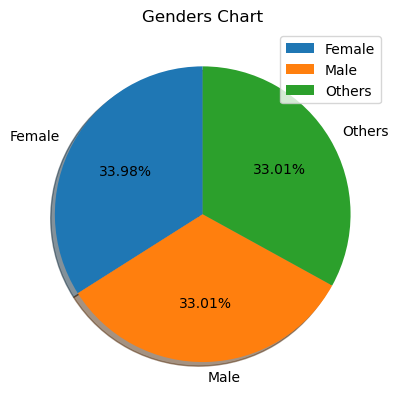

In [16]:
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].unique(),startangle = 90, shadow = True, autopct='%1.2f%%')
plt.legend()
plt.title('Genders Chart')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
df['Country']=le.fit_transform(df['Country'])
df['Gender']=le.fit_transform(df['Gender'])

C:\Users\PAVITHRA\AppData\Local\Temp\ipykernel_15320\1679067845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country']=le.fit_transform(df['Country'])
C:\Users\PAVITHRA\AppData\Local\Temp\ipykernel_15320\1679067845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=le.fit_transform(df['Gender'])


In [20]:
df

,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
0,0,1967,0,26012.0,5080.813,5.119653
1,0,1968,0,26192.0,5202.606,5.034400
2,0,1969,0,26335.0,5333.936,4.937255
3,0,1970,0,26562.0,5476.630,4.850063
4,0,1971,0,26671.0,5630.099,4.737217
...,...,...,...,...,...,...
30935,193,2015,2,9031.0,13814.642,0.653727
30936,193,2016,2,8566.0,14030.338,0.610534
30937,193,2017,2,8318.0,14236.599,0.584269
30938,193,2018,2,7692.0,14438.812,0.532731


C:\Users\PAVITHRA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mortality Rate', ylabel='Density'>

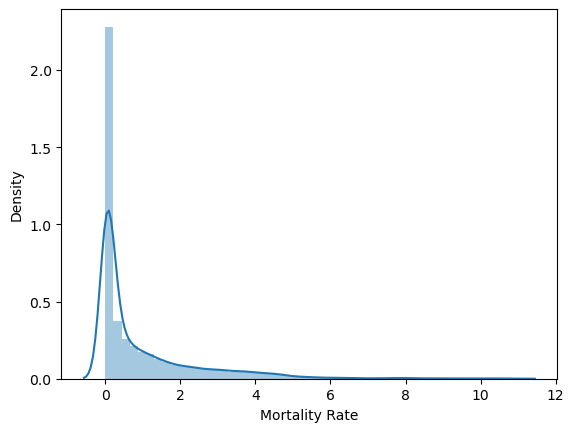

In [21]:
import seaborn as sns
sns.distplot(df['Mortality Rate'])

In [22]:
X = df.drop('Mortality Rate', axis =1)

In [23]:
X

,Country,Year,Gender,Child Mortality(1 to 4),Total Population
0,0,1967,0,26012.0,5080.813
1,0,1968,0,26192.0,5202.606
2,0,1969,0,26335.0,5333.936
3,0,1970,0,26562.0,5476.630
4,0,1971,0,26671.0,5630.099
...,...,...,...,...,...
30935,193,2015,2,9031.0,13814.642
30936,193,2016,2,8566.0,14030.338
30937,193,2017,2,8318.0,14236.599
30938,193,2018,2,7692.0,14438.812


In [24]:
y = df['Mortality Rate']

In [25]:
y

0        5.119653
1        5.034400
2        4.937255
3        4.850063
4        4.737217
           ...   
30935    0.653727
30936    0.610534
30937    0.584269
30938    0.532731
30939    0.505071
Name: Mortality Rate, Length: 30064, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=40)

In [27]:
X_test

,Country,Year,Gender,Child Mortality(1 to 4),Total Population
15188,93,1990,1,4072.0,2129.857
17322,106,1990,2,7.0,362.017
17728,109,1968,0,420.0,398.757
23539,146,2013,0,2.0,90.095
339,2,1967,1,29522.0,6661.827
...,...,...,...,...,...
17074,105,1989,1,22023.0,4099.150
25681,160,1988,1,11592.0,3525.266
8899,56,2008,1,971.0,1529.322
18798,116,1990,2,46789.0,12987.292


In [28]:
y_test

15188    1.911865
17322    0.019336
17728    1.053273
23539    0.022199
339      4.431517
           ...   
17074    5.372577
25681    3.288263
8899     0.634922
18798    3.602676
17331    0.012800
Name: Mortality Rate, Length: 9020, dtype: float64

In [29]:
y_train

1381     0.039121
1288     0.007814
9365     3.946414
17790    0.968997
29732    0.073802
           ...   
24788    1.173230
28516    3.637423
14799    0.403736
14853    0.324126
11888    0.402256
Name: Mortality Rate, Length: 21044, dtype: float64

In [30]:
X_test.to_csv('test.csv',index=False)

In [31]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regressor=RandomForestRegressor(criterion='mse',n_estimators=180)

#fit the model
regressor.fit(X_train,y_train)


#create the predict model
y_pred1=regressor.predict(X_test)


C:\Users\PAVITHRA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [32]:
from sklearn import metrics

# Model Evaluation
print('R^2:', metrics.r2_score(y_test, y_pred1))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred1))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:',metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

R^2: 0.9992838265251851
Adjusted R^2: 0.9992834292689865
MAE: 0.014663502843766125
MSE: 0.0015818279965601628
RMSE: 0.03977220130392788


In [33]:
import numpy as np
rf_compare = pd.DataFrame({'Real Values':y_test, 'Predicted Values': y_pred1})
rf_compare.head(10)

,Real Values,Predicted Values
15188,1.911865,1.918583
17322,0.019336,0.020116
17728,1.053273,1.056507
23539,0.022199,0.022207
339,4.431517,4.416591
14603,1.523055,1.503722
21945,0.152330,0.156847
20935,2.914837,2.922250
18792,3.768008,3.760276
1740,0.452978,0.444026


In [35]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=180,max_depth=100)


#fit the model
xgb.fit(X_train,y_train)



#create the predict model
y_pred2=xgb.predict(X_test)


In [36]:

# Model Evaluation
print('R^2:', metrics.r2_score(y_test, y_pred2))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred2))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:',metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

R^2: 0.9984652175753922
Adjusted R^2: 0.9984643662427848
MAE: 0.02359065297237996
MSE: 0.0033899074641105436
RMSE: 0.058222911848434235


In [37]:
xg_compare = pd.DataFrame({'Real Values':y_test, 'Predicted Values': y_pred2})
xg_compare.head(10)

,Real Values,Predicted Values
15188,1.911865,1.927048
17322,0.019336,0.020476
17728,1.053273,1.040518
23539,0.022199,0.022738
339,4.431517,4.464691
14603,1.523055,1.461040
21945,0.152330,0.153861
20935,2.914837,2.711911
18792,3.768008,3.781269
1740,0.452978,0.397881
